In this assignment you will build models to predict quality of wines.  Please review the data dictionary and data provenance here:

https://archive.ics.uci.edu/ml/datasets/wine+quality

The target variable has been recoded as 1 (quality > 6) and 0 (quality < 7)

1. Load the data
2. Explore the distribution of the target variable
3. Assess if there are any missing values
4. Explore the information value and distribution of features using the pairplot

2 pts.


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']))

In [24]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [26]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<Axes: >

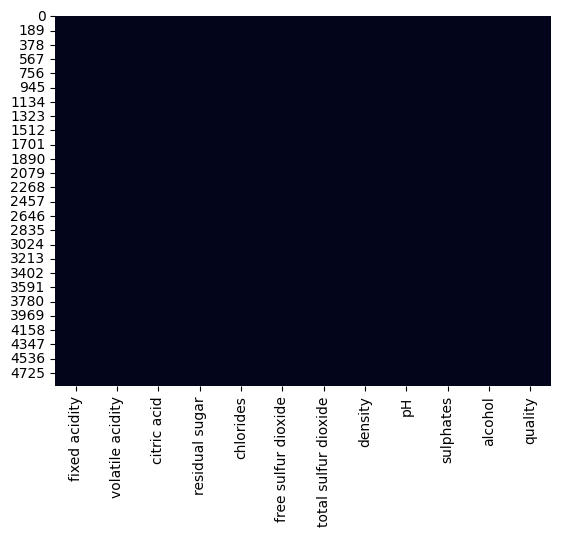

In [27]:
sns.heatmap(data.isnull(), cbar=False)

In [28]:
data['quality'] = (data['quality'] > 6).astype(int)

<Axes: >

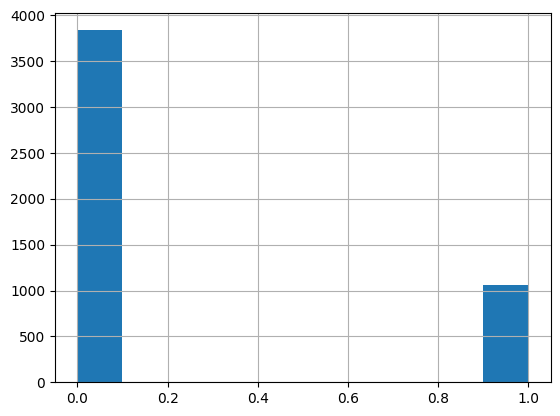

In [29]:
data['quality'].hist()

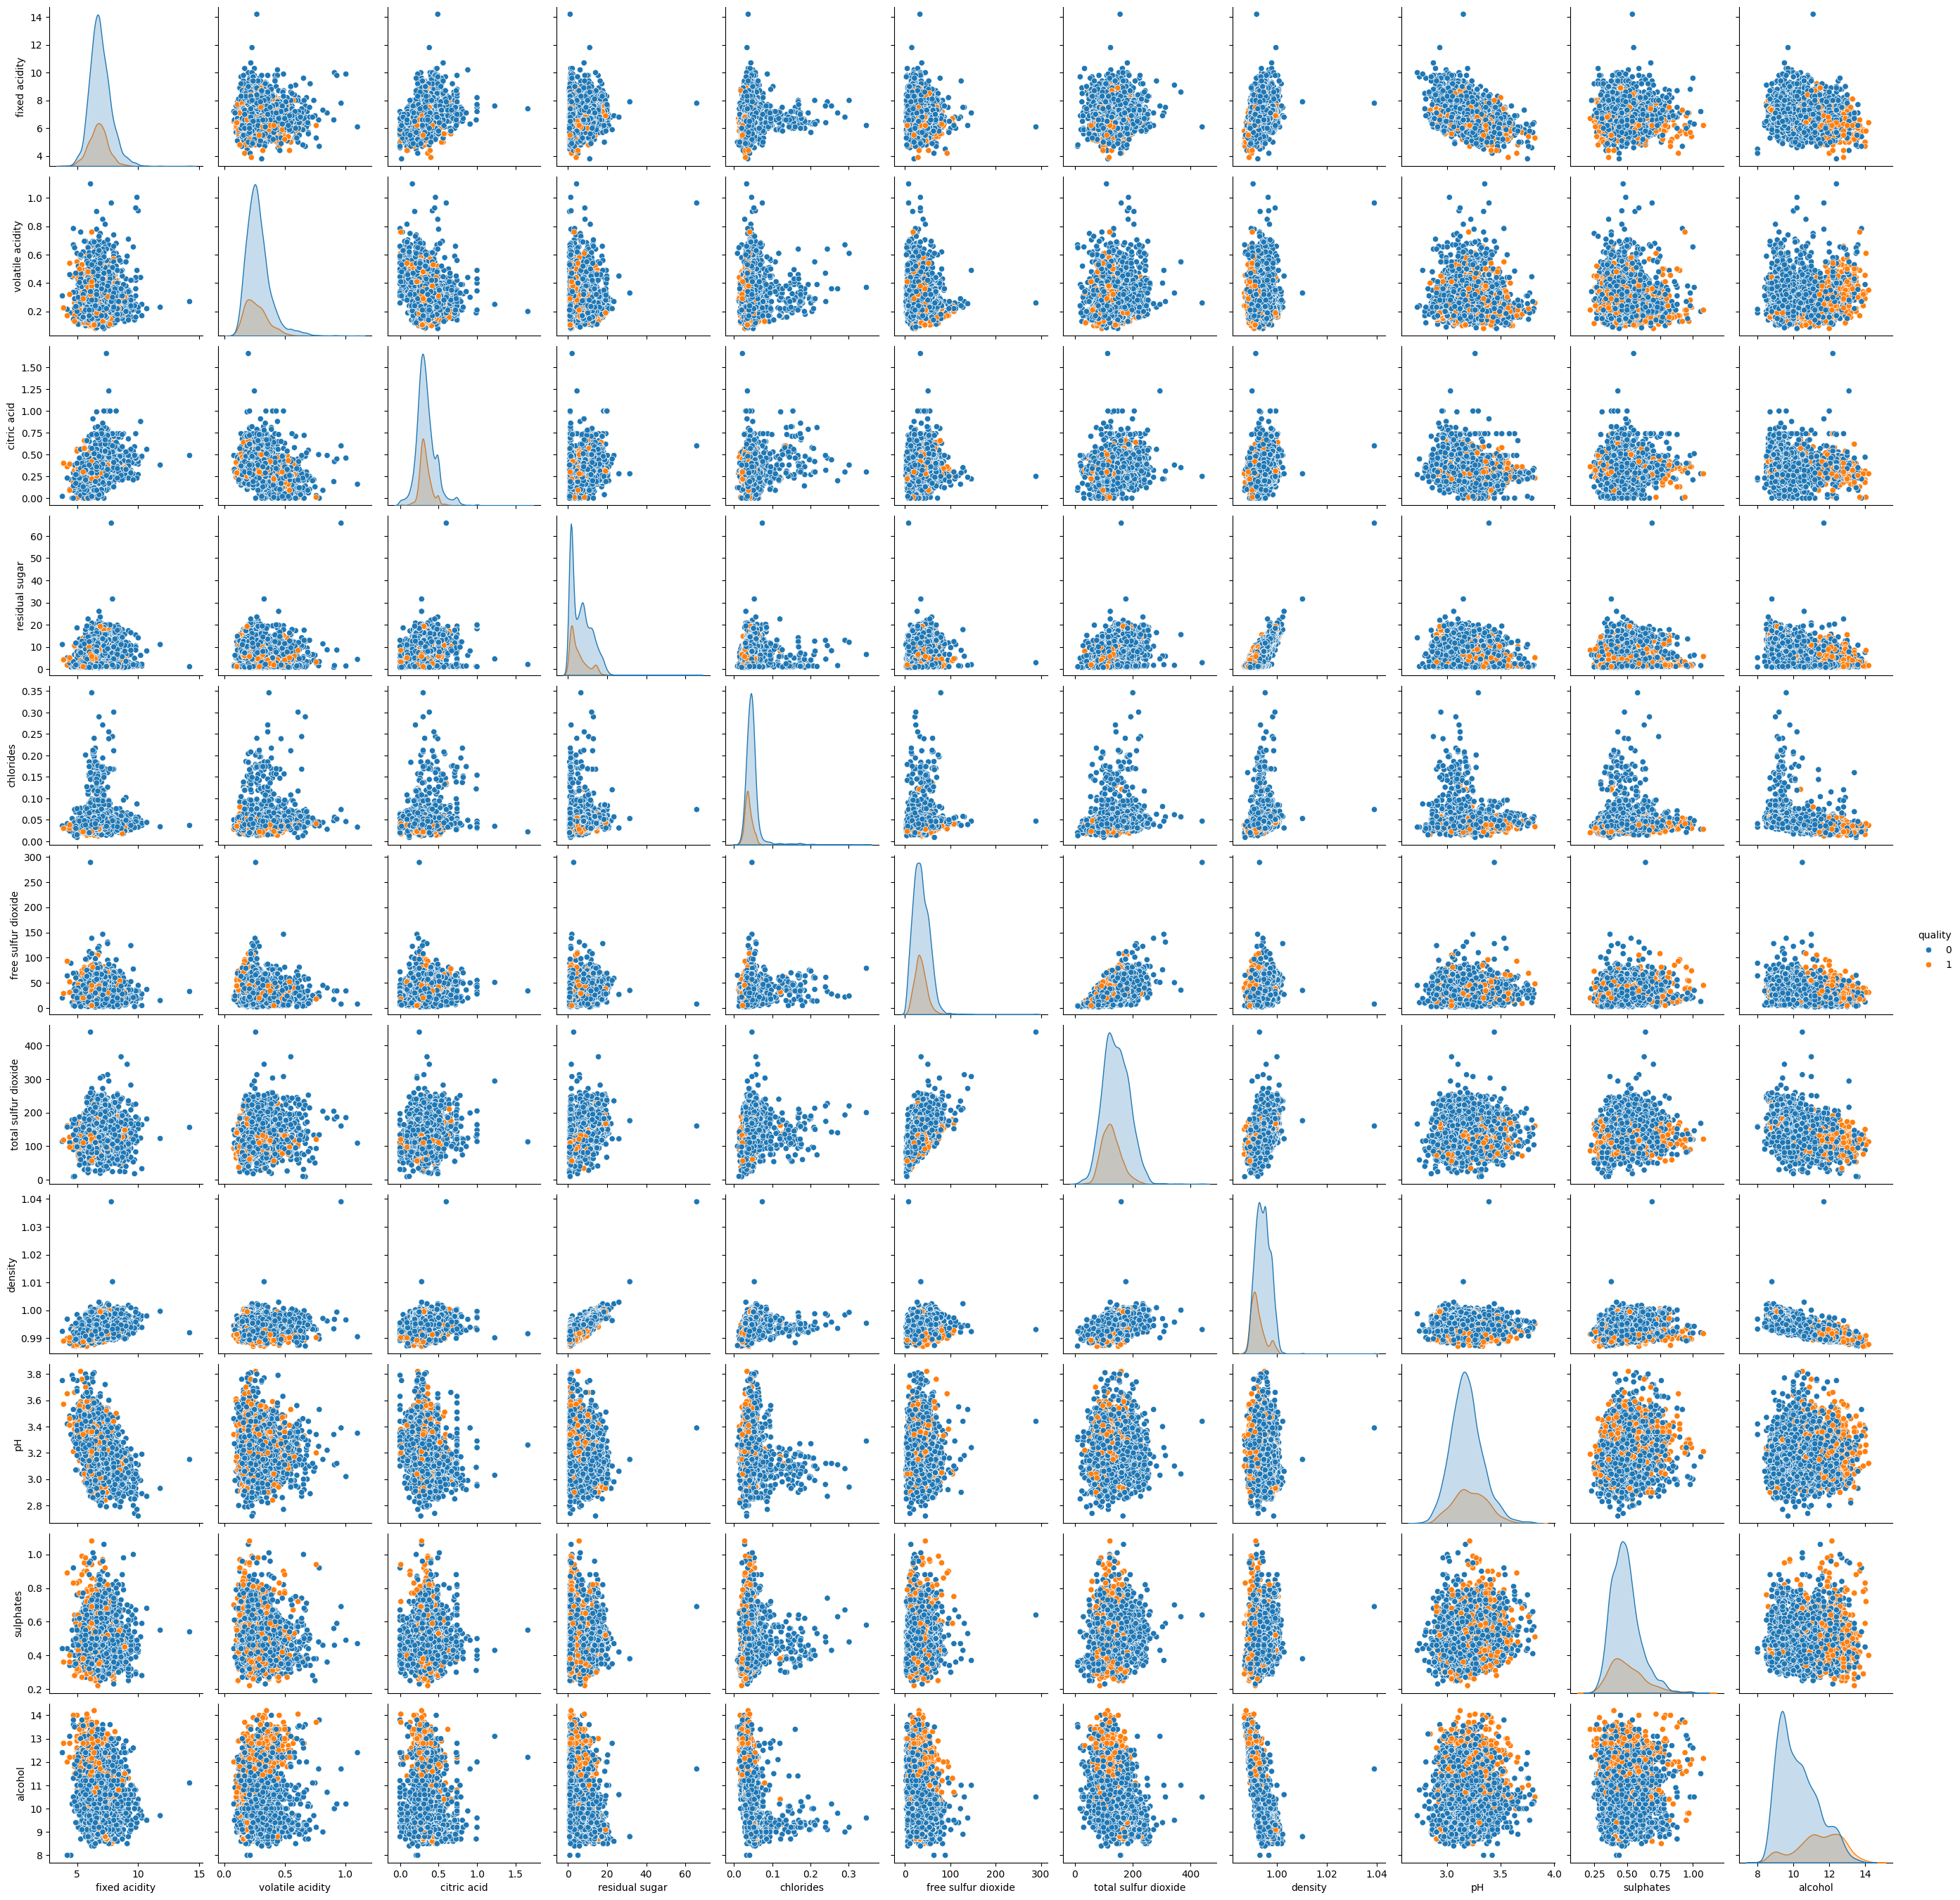

In [30]:
sns.pairplot(data, hue = 'quality')

In the pairplot of the wine dataset, each plot compares two features, and the distributions on the diagonal tell us how each feature varies on its own. What stands out is:

**Features show different types of distributions, some normal and some skewed.

**Some pairs of features show patterns, suggesting they might be related.

**Different colors on the plots for wine quality hint at which features are key for good wine.

  The pairplot points to which features may predict quality and if any pre-modeling tweaks are needed.

5. Develop logistic regression, kNN (optimize k), random forest and boosted tree models to predict wine quality. Make sure to preprocess the data as needed by the respective models.

6. Assess the performance of each model using the following metrics: Recall, Precision, F1, ROC AUC.  Which is the best model based on ROC AUC?

18 pts.

In [31]:
X_log = data.drop('quality', axis=1)
y_log = data['quality']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.3, random_state=1)

In [33]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [34]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.423624
         Iterations 7
                            Results: Logit
Model:                 Logit             Method:            MLE        
Dependent Variable:    quality           Pseudo R-squared:  0.180      
Date:                  2024-04-01 03:51  AIC:               2926.3629  
No. Observations:      3428              BIC:               2993.8999  
Df Model:              10                Log-Likelihood:    -1452.2    
Df Residuals:          3417              LL-Null:           -1769.9    
Converged:             1.0000            LLR p-value:       4.3835e-130
No. Iterations:        7.0000            Scale:             1.0000     
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
fixed acidity          0.0891   0.0679  1.3110 0.1898  -0.0441 

In [35]:
data_log = data[['volatile acidity','chlorides','total sulfur dioxide','sulphates','alcohol','quality']]

In [36]:
X_log = data_log.drop('quality', axis=1)
y_log = data_log['quality']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.3, random_state=1)

In [38]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [39]:
y_pred = logmodel.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1136
           1       0.60      0.16      0.25       334

    accuracy                           0.79      1470
   macro avg       0.70      0.56      0.56      1470
weighted avg       0.75      0.79      0.73      1470



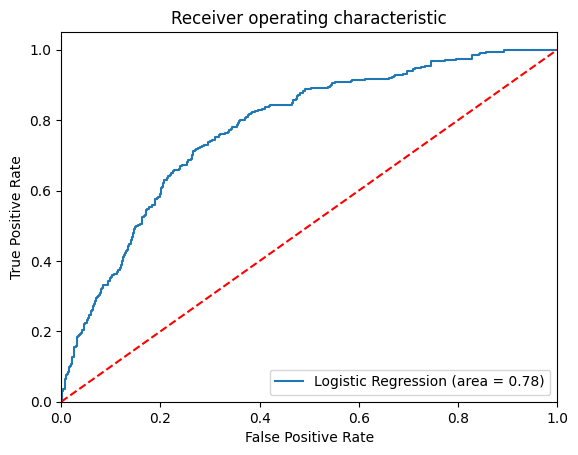

In [41]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**KNN MODEL**



In [42]:
X_knn = data.drop('quality', axis=1)
y_knn = data['quality']

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X_knn)

X_rescaled = pd.DataFrame(X_, columns=X_knn.columns)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y_knn, test_size=0.3, random_state=1)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

#TO FIND OPTIMAL K VALUE BASED ON ROC AUC
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):

    knn = KNeighborsClassifier(n_neighbors=K)

    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")

    cv_scores.append(scores.mean())

selected_k=cv_scores.index(max(cv_scores))+1

print('Optimal k: ', cv_scores.index(max(cv_scores))+1)

Optimal k:  40


Optimal Value of k: [40]


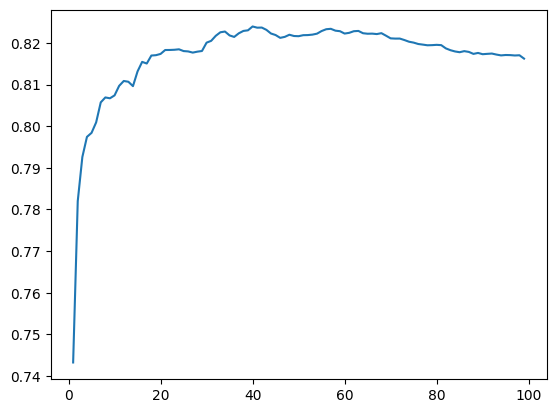

In [46]:
sns.lineplot(x=range(1,max_K), y=cv_scores)

max_y = max(cv_scores)
max_x = [i for i, score in enumerate(cv_scores, start=1) if score == max_y]
print("Optimal Value of k:", max_x)

In [47]:
knn = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1040   96]
 [ 189  145]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1136
           1       0.60      0.43      0.50       334

    accuracy                           0.81      1470
   macro avg       0.72      0.67      0.69      1470
weighted avg       0.79      0.81      0.79      1470



In [48]:
from sklearn.metrics import roc_auc_score
print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.6748123471367125


**PRACTICE-DECISION TREE**

---



In [49]:
X_dt = data.drop('quality', axis=1)
y_dt = data['quality']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1)

In [51]:
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [52]:
y_pred = dt_model.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1136
           1       0.54      0.43      0.48       334

    accuracy                           0.79      1470
   macro avg       0.69      0.66      0.67      1470
weighted avg       0.77      0.79      0.78      1470



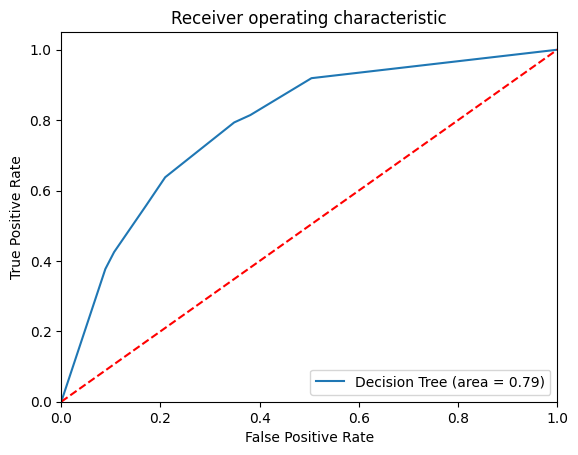

In [54]:
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

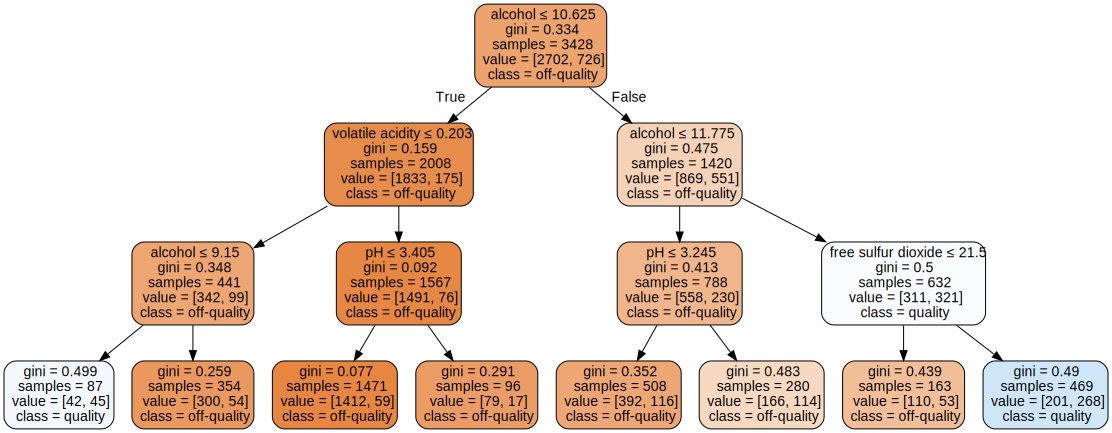

In [55]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt_model, out_file=None,
                      feature_names=X_dt.columns,
                      class_names=['off-quality','quality'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

**`3 & 4-Random Forest & Boosted Tree`**




In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[1107,   29],
       [ 242,   92]])

In [57]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1136
           1       0.76      0.28      0.40       334

    accuracy                           0.82      1470
   macro avg       0.79      0.62      0.65      1470
weighted avg       0.81      0.82      0.78      1470



In [58]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

print(classification_report(y_test, rf_random.predict(X_test)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [60]:
#Boosted Tree
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

confusion_matrix(y_test,y_pred_bt)

array([[1049,   87],
       [ 175,  159]])

In [61]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1136
           1       0.65      0.48      0.55       334

    accuracy                           0.82      1470
   macro avg       0.75      0.70      0.72      1470
weighted avg       0.81      0.82      0.81      1470



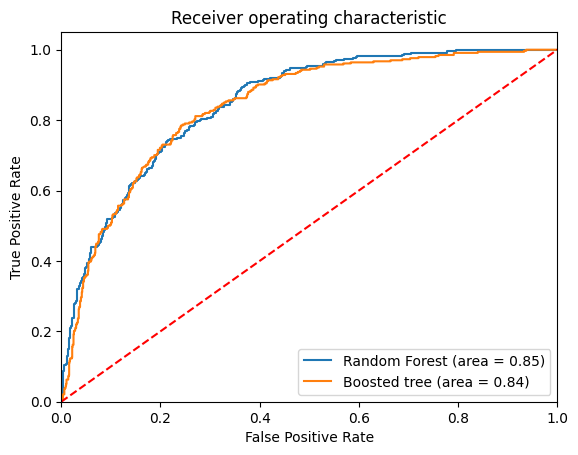

In [62]:
# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In the study focused on wine quality prediction, a range of machine learning models were evaluated using the UCI Machine Learning Repository's wine dataset. The research involved preprocessing the data, including converting the target variable into binary form to classify wines as high or low quality. The investigation included logistic regression, k-Nearest Neighbors (kNN), decision tree, random forest, and boosted tree models, with specific attention to preprocessing steps such as feature scaling for the kNN model.

Findings highlighted:

Logistic regression pinpointed significant predictors but fell short in accurately predicting high-quality wines.
The kNN model, determined to have an optimal k value of 40, was implemented with k=13, showing moderate performance.
The decision tree demonstrated reasonable performance for low-quality wines but was less successful with high-quality wines.
The random forest model showed superior performance in identifying low-quality wines, indicating its effectiveness with imbalanced data.
The performance of the boosted tree model was not fully detailed due to missing evaluations.
The research emphasized comparing models using metrics like precision, recall, F1 scores, and particularly ROC AUC. However, limitations in the ROC AUC score calculations and incomplete evaluations for some models prevented a definitive conclusion on the best model. Addressing these calculation issues and providing a comprehensive assessment of all models would solidify the findings, offering clearer guidance on the most effective model for wine quality prediction.